In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input/dataset2-master/images"))

['TEST', 'TEST_SIMPLE', 'TRAIN']


In [3]:
import os
import zipfile
from tqdm import tqdm
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

b_dir = "input/dataset2-master/images/"
def load_images(folder):
  dir = b_dir + folder
  images = []
  for folders in tqdm(os.listdir(dir)):
    for files in os.listdir(os.path.join(os.path.join(dir,folders))):
      #print(files,folders)
      filepath = os.path.join(os.path.join(dir,folders),files)
      img = cv2.imread(filepath)
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      img = cv2.resize(img,(32,24))
      #img = np.asarray(img)
      img = img/255.
      images.append((img,folders))
  return images
train = load_images('TRAIN')
test = load_images('TEST')
val = load_images('TEST_SIMPLE')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 22.79it/s]


In [4]:
def create_dataset(data):
  x = []
  y = []
  for obj in data:
    x.append(obj[0])
    y.append(obj[1])
  x = np.array(x)
  y = np.array(y)
  return x,y

In [5]:
x_train,y_train = create_dataset(train)
x_test,y_test = create_dataset(test)
x_val,y_val = create_dataset(val)
del train
del val
del test

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_enc_train = encoder.fit_transform(y_train)
y_enc_test = encoder.transform(y_test)
y_enc_val = encoder.transform(y_val)

In [7]:
from keras.utils import to_categorical
y_cat_train = to_categorical(y_enc_train,4)
y_cat_test = to_categorical(y_enc_test,4)
y_cat_val = to_categorical(y_enc_val,4)

Using TensorFlow backend.


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

batch_size = 128
epochs = 20

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(24,32,3),strides=2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [20]:
hist = model.fit(x_train,y_cat_train,batch_size,epochs ,validation_data=(x_test,y_cat_test))

Train on 9957 samples, validate on 2487 samples
Epoch 1/20
9957/9957 [==============================] - ETA: 1:04 - loss: 1.4741 - acc: 0.265 - ETA: 34s - loss: 1.4840 - acc: 0.261 - ETA: 24s - loss: 1.5202 - acc: 0.23 - ETA: 19s - loss: 1.5052 - acc: 0.23 - ETA: 16s - loss: 1.4940 - acc: 0.22 - ETA: 14s - loss: 1.4790 - acc: 0.22 - ETA: 13s - loss: 1.4714 - acc: 0.22 - ETA: 12s - loss: 1.4629 - acc: 0.22 - ETA: 11s - loss: 1.4566 - acc: 0.23 - ETA: 10s - loss: 1.4505 - acc: 0.23 - ETA: 10s - loss: 1.4451 - acc: 0.23 - ETA: 9s - loss: 1.4399 - acc: 0.2435 - ETA: 9s - loss: 1.4352 - acc: 0.245 - ETA: 8s - loss: 1.4315 - acc: 0.246 - ETA: 8s - loss: 1.4289 - acc: 0.243 - ETA: 8s - loss: 1.4260 - acc: 0.244 - ETA: 8s - loss: 1.4239 - acc: 0.243 - ETA: 7s - loss: 1.4221 - acc: 0.242 - ETA: 7s - loss: 1.4203 - acc: 0.242 - ETA: 7s - loss: 1.4185 - acc: 0.245 - ETA: 6s - loss: 1.4171 - acc: 0.245 - ETA: 6s - loss: 1.4157 - acc: 0.245 - ETA: 6s - loss: 1.4145 - acc: 0.243 - ETA: 6s - loss: 1.

9957/9957 [==============================] - ETA: 4s - loss: 1.3865 - acc: 0.289 - ETA: 4s - loss: 1.3855 - acc: 0.273 - ETA: 4s - loss: 1.3858 - acc: 0.242 - ETA: 4s - loss: 1.3847 - acc: 0.267 - ETA: 5s - loss: 1.3853 - acc: 0.265 - ETA: 5s - loss: 1.3852 - acc: 0.256 - ETA: 5s - loss: 1.3847 - acc: 0.260 - ETA: 5s - loss: 1.3857 - acc: 0.252 - ETA: 5s - loss: 1.3857 - acc: 0.256 - ETA: 5s - loss: 1.3859 - acc: 0.257 - ETA: 5s - loss: 1.3864 - acc: 0.252 - ETA: 5s - loss: 1.3867 - acc: 0.249 - ETA: 5s - loss: 1.3863 - acc: 0.256 - ETA: 5s - loss: 1.3864 - acc: 0.258 - ETA: 5s - loss: 1.3863 - acc: 0.262 - ETA: 5s - loss: 1.3862 - acc: 0.259 - ETA: 5s - loss: 1.3861 - acc: 0.258 - ETA: 5s - loss: 1.3863 - acc: 0.256 - ETA: 5s - loss: 1.3863 - acc: 0.259 - ETA: 5s - loss: 1.3863 - acc: 0.259 - ETA: 5s - loss: 1.3863 - acc: 0.257 - ETA: 5s - loss: 1.3862 - acc: 0.257 - ETA: 5s - loss: 1.3862 - acc: 0.256 - ETA: 4s - loss: 1.3863 - acc: 0.256 - ETA: 4s - loss: 1.3864 - acc: 0.255 - ETA: 

9957/9957 [==============================] - ETA: 5s - loss: 1.3776 - acc: 0.304 - ETA: 7s - loss: 1.3745 - acc: 0.320 - ETA: 7s - loss: 1.3777 - acc: 0.317 - ETA: 7s - loss: 1.3786 - acc: 0.310 - ETA: 8s - loss: 1.3771 - acc: 0.317 - ETA: 7s - loss: 1.3762 - acc: 0.321 - ETA: 7s - loss: 1.3753 - acc: 0.321 - ETA: 7s - loss: 1.3765 - acc: 0.316 - ETA: 7s - loss: 1.3747 - acc: 0.321 - ETA: 7s - loss: 1.3740 - acc: 0.320 - ETA: 6s - loss: 1.3737 - acc: 0.313 - ETA: 6s - loss: 1.3732 - acc: 0.317 - ETA: 6s - loss: 1.3709 - acc: 0.321 - ETA: 6s - loss: 1.3695 - acc: 0.324 - ETA: 6s - loss: 1.3696 - acc: 0.320 - ETA: 6s - loss: 1.3709 - acc: 0.318 - ETA: 6s - loss: 1.3692 - acc: 0.318 - ETA: 5s - loss: 1.3676 - acc: 0.322 - ETA: 5s - loss: 1.3657 - acc: 0.324 - ETA: 5s - loss: 1.3643 - acc: 0.325 - ETA: 5s - loss: 1.3632 - acc: 0.325 - ETA: 5s - loss: 1.3639 - acc: 0.323 - ETA: 5s - loss: 1.3637 - acc: 0.323 - ETA: 5s - loss: 1.3634 - acc: 0.322 - ETA: 5s - loss: 1.3643 - acc: 0.319 - ETA: 

9957/9957 [==============================] - ETA: 6s - loss: 1.1270 - acc: 0.492 - ETA: 6s - loss: 1.1399 - acc: 0.480 - ETA: 5s - loss: 1.1400 - acc: 0.500 - ETA: 5s - loss: 1.1326 - acc: 0.490 - ETA: 5s - loss: 1.1630 - acc: 0.465 - ETA: 5s - loss: 1.1511 - acc: 0.467 - ETA: 5s - loss: 1.1416 - acc: 0.477 - ETA: 5s - loss: 1.1408 - acc: 0.475 - ETA: 5s - loss: 1.1484 - acc: 0.465 - ETA: 5s - loss: 1.1429 - acc: 0.470 - ETA: 5s - loss: 1.1379 - acc: 0.473 - ETA: 5s - loss: 1.1330 - acc: 0.474 - ETA: 5s - loss: 1.1268 - acc: 0.477 - ETA: 5s - loss: 1.1302 - acc: 0.476 - ETA: 5s - loss: 1.1293 - acc: 0.477 - ETA: 4s - loss: 1.1274 - acc: 0.475 - ETA: 4s - loss: 1.1202 - acc: 0.479 - ETA: 4s - loss: 1.1168 - acc: 0.484 - ETA: 4s - loss: 1.1184 - acc: 0.483 - ETA: 4s - loss: 1.1133 - acc: 0.486 - ETA: 4s - loss: 1.1121 - acc: 0.486 - ETA: 4s - loss: 1.1108 - acc: 0.486 - ETA: 4s - loss: 1.1124 - acc: 0.484 - ETA: 4s - loss: 1.1085 - acc: 0.487 - ETA: 4s - loss: 1.1125 - acc: 0.485 - ETA: 

9957/9957 [==============================] - ETA: 7s - loss: 0.9988 - acc: 0.562 - ETA: 7s - loss: 0.9762 - acc: 0.550 - ETA: 7s - loss: 0.9589 - acc: 0.562 - ETA: 6s - loss: 0.9880 - acc: 0.562 - ETA: 6s - loss: 0.9784 - acc: 0.570 - ETA: 5s - loss: 0.9682 - acc: 0.570 - ETA: 5s - loss: 0.9620 - acc: 0.565 - ETA: 5s - loss: 0.9582 - acc: 0.564 - ETA: 5s - loss: 0.9589 - acc: 0.559 - ETA: 5s - loss: 0.9440 - acc: 0.566 - ETA: 5s - loss: 0.9395 - acc: 0.569 - ETA: 5s - loss: 0.9420 - acc: 0.568 - ETA: 5s - loss: 0.9456 - acc: 0.570 - ETA: 5s - loss: 0.9508 - acc: 0.573 - ETA: 5s - loss: 0.9510 - acc: 0.570 - ETA: 5s - loss: 0.9509 - acc: 0.570 - ETA: 4s - loss: 0.9476 - acc: 0.573 - ETA: 4s - loss: 0.9446 - acc: 0.574 - ETA: 4s - loss: 0.9416 - acc: 0.574 - ETA: 4s - loss: 0.9365 - acc: 0.577 - ETA: 4s - loss: 0.9364 - acc: 0.575 - ETA: 4s - loss: 0.9349 - acc: 0.579 - ETA: 4s - loss: 0.9356 - acc: 0.580 - ETA: 4s - loss: 0.9361 - acc: 0.578 - ETA: 4s - loss: 0.9357 - acc: 0.578 - ETA: 

9957/9957 [==============================] - ETA: 6s - loss: 0.6799 - acc: 0.671 - ETA: 7s - loss: 0.7464 - acc: 0.668 - ETA: 7s - loss: 0.7718 - acc: 0.661 - ETA: 7s - loss: 0.8235 - acc: 0.640 - ETA: 7s - loss: 0.8318 - acc: 0.635 - ETA: 7s - loss: 0.8425 - acc: 0.627 - ETA: 7s - loss: 0.8434 - acc: 0.630 - ETA: 7s - loss: 0.8548 - acc: 0.622 - ETA: 7s - loss: 0.8642 - acc: 0.612 - ETA: 7s - loss: 0.8594 - acc: 0.610 - ETA: 7s - loss: 0.8594 - acc: 0.610 - ETA: 6s - loss: 0.8612 - acc: 0.612 - ETA: 6s - loss: 0.8605 - acc: 0.616 - ETA: 6s - loss: 0.8571 - acc: 0.618 - ETA: 6s - loss: 0.8515 - acc: 0.620 - ETA: 6s - loss: 0.8522 - acc: 0.621 - ETA: 6s - loss: 0.8592 - acc: 0.615 - ETA: 6s - loss: 0.8535 - acc: 0.619 - ETA: 6s - loss: 0.8606 - acc: 0.614 - ETA: 5s - loss: 0.8577 - acc: 0.614 - ETA: 5s - loss: 0.8605 - acc: 0.613 - ETA: 5s - loss: 0.8657 - acc: 0.609 - ETA: 5s - loss: 0.8665 - acc: 0.606 - ETA: 5s - loss: 0.8645 - acc: 0.606 - ETA: 5s - loss: 0.8683 - acc: 0.605 - ETA: 

9957/9957 [==============================] - ETA: 6s - loss: 0.7621 - acc: 0.687 - ETA: 6s - loss: 0.7716 - acc: 0.695 - ETA: 7s - loss: 0.7662 - acc: 0.684 - ETA: 6s - loss: 0.7690 - acc: 0.681 - ETA: 6s - loss: 0.7787 - acc: 0.667 - ETA: 5s - loss: 0.7794 - acc: 0.662 - ETA: 5s - loss: 0.7905 - acc: 0.659 - ETA: 5s - loss: 0.7932 - acc: 0.654 - ETA: 5s - loss: 0.7989 - acc: 0.654 - ETA: 5s - loss: 0.8026 - acc: 0.653 - ETA: 5s - loss: 0.8071 - acc: 0.648 - ETA: 5s - loss: 0.8114 - acc: 0.646 - ETA: 5s - loss: 0.8105 - acc: 0.649 - ETA: 5s - loss: 0.8139 - acc: 0.644 - ETA: 5s - loss: 0.8128 - acc: 0.641 - ETA: 5s - loss: 0.8170 - acc: 0.637 - ETA: 5s - loss: 0.8157 - acc: 0.639 - ETA: 5s - loss: 0.8129 - acc: 0.640 - ETA: 4s - loss: 0.8129 - acc: 0.640 - ETA: 4s - loss: 0.8151 - acc: 0.639 - ETA: 4s - loss: 0.8196 - acc: 0.636 - ETA: 4s - loss: 0.8151 - acc: 0.639 - ETA: 4s - loss: 0.8143 - acc: 0.638 - ETA: 4s - loss: 0.8113 - acc: 0.642 - ETA: 4s - loss: 0.8111 - acc: 0.644 - ETA: 

9957/9957 [==============================] - ETA: 6s - loss: 0.7586 - acc: 0.648 - ETA: 7s - loss: 0.7502 - acc: 0.679 - ETA: 8s - loss: 0.7615 - acc: 0.666 - ETA: 8s - loss: 0.7448 - acc: 0.666 - ETA: 7s - loss: 0.7486 - acc: 0.670 - ETA: 8s - loss: 0.7346 - acc: 0.683 - ETA: 7s - loss: 0.7314 - acc: 0.688 - ETA: 7s - loss: 0.7252 - acc: 0.691 - ETA: 7s - loss: 0.7305 - acc: 0.682 - ETA: 7s - loss: 0.7296 - acc: 0.678 - ETA: 6s - loss: 0.7377 - acc: 0.675 - ETA: 6s - loss: 0.7274 - acc: 0.676 - ETA: 6s - loss: 0.7224 - acc: 0.680 - ETA: 6s - loss: 0.7197 - acc: 0.679 - ETA: 6s - loss: 0.7176 - acc: 0.681 - ETA: 6s - loss: 0.7148 - acc: 0.681 - ETA: 5s - loss: 0.7203 - acc: 0.682 - ETA: 5s - loss: 0.7158 - acc: 0.686 - ETA: 5s - loss: 0.7136 - acc: 0.689 - ETA: 5s - loss: 0.7177 - acc: 0.690 - ETA: 5s - loss: 0.7178 - acc: 0.690 - ETA: 5s - loss: 0.7156 - acc: 0.689 - ETA: 5s - loss: 0.7135 - acc: 0.688 - ETA: 5s - loss: 0.7134 - acc: 0.688 - ETA: 5s - loss: 0.7112 - acc: 0.691 - ETA: 

9957/9957 [==============================] - ETA: 6s - loss: 0.7833 - acc: 0.671 - ETA: 6s - loss: 0.7381 - acc: 0.699 - ETA: 7s - loss: 0.7142 - acc: 0.708 - ETA: 7s - loss: 0.7010 - acc: 0.718 - ETA: 7s - loss: 0.6868 - acc: 0.728 - ETA: 7s - loss: 0.7061 - acc: 0.713 - ETA: 7s - loss: 0.7046 - acc: 0.716 - ETA: 7s - loss: 0.7076 - acc: 0.713 - ETA: 7s - loss: 0.6984 - acc: 0.712 - ETA: 7s - loss: 0.6954 - acc: 0.712 - ETA: 6s - loss: 0.6958 - acc: 0.713 - ETA: 6s - loss: 0.6960 - acc: 0.710 - ETA: 6s - loss: 0.6934 - acc: 0.711 - ETA: 6s - loss: 0.6889 - acc: 0.714 - ETA: 6s - loss: 0.6886 - acc: 0.712 - ETA: 6s - loss: 0.6909 - acc: 0.712 - ETA: 6s - loss: 0.6894 - acc: 0.712 - ETA: 6s - loss: 0.6996 - acc: 0.707 - ETA: 6s - loss: 0.7002 - acc: 0.704 - ETA: 6s - loss: 0.6975 - acc: 0.707 - ETA: 5s - loss: 0.6938 - acc: 0.709 - ETA: 5s - loss: 0.6898 - acc: 0.712 - ETA: 5s - loss: 0.6852 - acc: 0.712 - ETA: 5s - loss: 0.6865 - acc: 0.711 - ETA: 5s - loss: 0.6819 - acc: 0.714 - ETA: 

9957/9957 [==============================] - ETA: 6s - loss: 0.7669 - acc: 0.601 - ETA: 7s - loss: 0.6938 - acc: 0.671 - ETA: 7s - loss: 0.6653 - acc: 0.703 - ETA: 7s - loss: 0.6347 - acc: 0.730 - ETA: 7s - loss: 0.6288 - acc: 0.740 - ETA: 6s - loss: 0.6165 - acc: 0.748 - ETA: 6s - loss: 0.6070 - acc: 0.752 - ETA: 6s - loss: 0.6056 - acc: 0.753 - ETA: 6s - loss: 0.6184 - acc: 0.743 - ETA: 6s - loss: 0.6194 - acc: 0.742 - ETA: 6s - loss: 0.6167 - acc: 0.747 - ETA: 6s - loss: 0.6236 - acc: 0.741 - ETA: 6s - loss: 0.6279 - acc: 0.741 - ETA: 6s - loss: 0.6280 - acc: 0.743 - ETA: 6s - loss: 0.6218 - acc: 0.746 - ETA: 5s - loss: 0.6200 - acc: 0.747 - ETA: 5s - loss: 0.6153 - acc: 0.748 - ETA: 5s - loss: 0.6109 - acc: 0.752 - ETA: 5s - loss: 0.6088 - acc: 0.752 - ETA: 5s - loss: 0.6110 - acc: 0.749 - ETA: 5s - loss: 0.6136 - acc: 0.748 - ETA: 5s - loss: 0.6146 - acc: 0.750 - ETA: 5s - loss: 0.6132 - acc: 0.749 - ETA: 5s - loss: 0.6175 - acc: 0.746 - ETA: 5s - loss: 0.6195 - acc: 0.745 - ETA: 

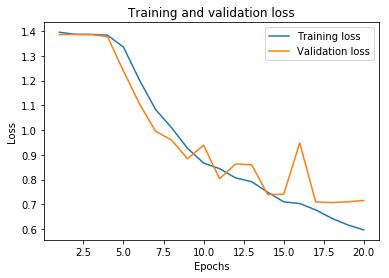

In [21]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

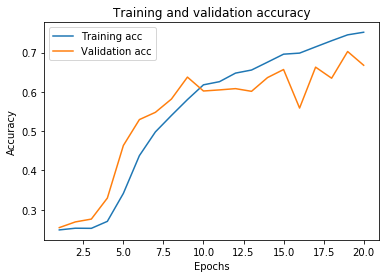

In [22]:
#Accuracy Plot
history_dict = hist.history
history_dict.keys()
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()